In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data = pd.read_csv('playstore-data.csv.gz',compression='gzip')

In [87]:
data.head()

,Unnamed: 0,Category,Free,Price,Size,Min_Version,DeveloperId,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Rating,Rating_Count,Rating_Sum,Min_Downloads
0,0,Adventure,True,0.0,10.0,7.1,Jean Confident Irénée NIYIZIBYOSE,18,18,Everyone,False,False,0.0,0,0.0,10
1,1,Tools,True,0.0,2.9,5.0,Webserveis,15,4,Everyone,True,False,4.4,64,281.6,5000
2,2,Productivity,True,0.0,3.7,4.0,Cabin Crew,25,24,Everyone,False,False,0.0,0,0.0,50
3,3,Communication,True,0.0,1.8,4.0,Climate Smart Tech2,36,34,Everyone,True,False,5.0,5,25.0,10
4,4,Tools,True,0.0,6.2,4.1,Rafal Milek-Horodyski,18,34,Everyone,False,False,0.0,0,0.0,100


In [88]:
print(data[data['Rating'] == 0.0].shape)
df = data[data['Rating'] == 0.0]
df[df['Rating_Count'] == 0].shape

(1005064, 16)


(1005064, 16)

In [89]:
print(data.shape)
data.drop(data[data['Rating'] == 0.0].index,inplace=True)
data.shape

(2145742, 16)


(1140678, 16)

In [90]:
data.drop(['Unnamed: 0'],1,inplace=True)

In [101]:
data

,Category,Free,Price,Size,Min_Version,DeveloperId,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Rating,Rating_Count,Rating_Sum,Min_Downloads
1,Tools,True,0.0,2.9,5.0,Webserveis,15,4,Everyone,True,False,4.4,64,281.6,5000
3,Communication,True,0.0,1.8,4.0,Climate Smart Tech2,36,34,Everyone,True,False,5.0,5,25.0,10
6,Libraries & Demo,True,0.0,2.5,4.1,android developer779,23,23,Everyone,True,False,4.5,12,54.0,1000
7,Lifestyle,True,0.0,16.0,5.0,Mozaix LLC,26,26,Everyone,False,False,2.0,39,78.0,500
8,Personalization,True,0.0,3.5,4.1,Free 2021 Themes for Emoji keyboard,23,11,Everyone,True,False,4.7,820,3854.0,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145731,Action,True,0.0,37.0,4.0,Upopa Games,70,54,Teen,True,True,4.3,103466,444903.8,5000000
2145732,Music & Audio,True,0.0,4.1,2.2,Single Cell Software,81,81,Everyone,False,False,4.0,344,1376.0,500000
2145737,Education,True,0.0,10.0,4.1,Julio Augusto Vera,39,32,Everyone,True,False,3.4,17,57.8,1000
2145740,Music & Audio,True,0.0,10.0,5.0,Bhakti,61,4,Everyone,True,False,3.5,8,28.0,1000


In [91]:
data.dtypes

Category            object
Free                  bool
Price              float64
Size               float64
Min_Version        float64
DeveloperId         object
Released_Before      int64
Updated_Before       int64
Content             object
Ad_Support            bool
Inapp_Purchase        bool
Rating             float64
Rating_Count         int64
Rating_Sum         float64
Min_Downloads        int64
dtype: object

In [92]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and data[feature].dtypes != 'bool']
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print(numerical_features,categorical_features)

['Price', 'Size', 'Min_Version', 'Released_Before', 'Updated_Before', 'Rating', 'Rating_Count', 'Rating_Sum', 'Min_Downloads'] ['Category', 'DeveloperId', 'Content']


In [93]:
discreate_feature = ['Min_Version','Min_Downloads']
continuous_feature = [features for features in numerical_features if features not in discreate_feature]

In [94]:
print(continuous_feature,discreate_feature)

['Price', 'Size', 'Released_Before', 'Updated_Before', 'Rating', 'Rating_Count', 'Rating_Sum'] ['Min_Version', 'Min_Downloads']


<AxesSubplot:>

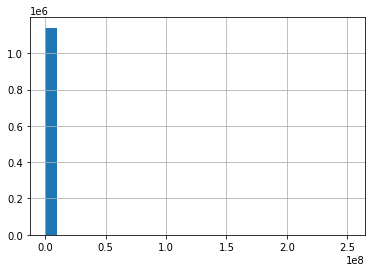

In [100]:
data["Rating_Sum"].hist(bins = 25)

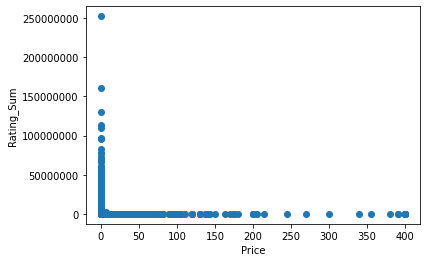

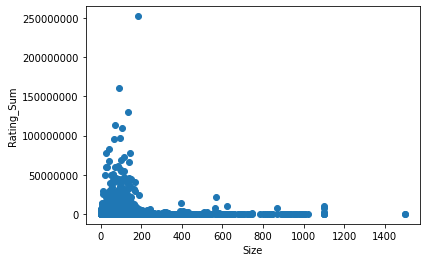

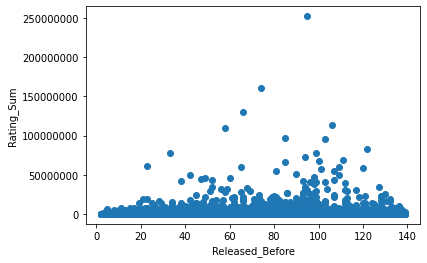

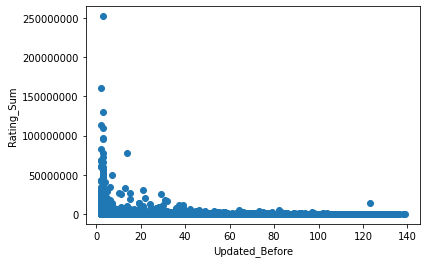

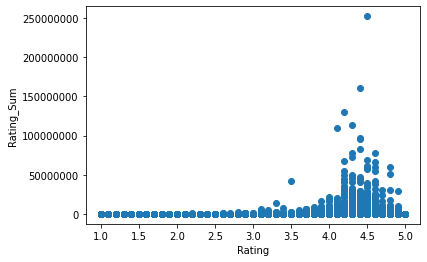

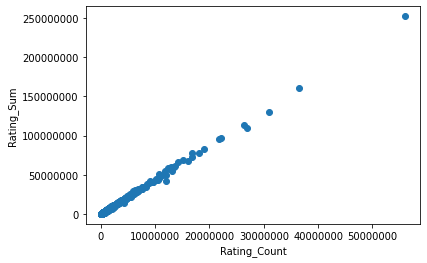

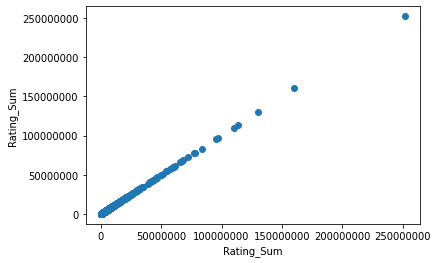

In [99]:
for feature in continuous_feature:
    plt.scatter(data[feature],data['Rating_Sum'])
    plt.xlabel(feature)
    plt.ylabel('Rating_Sum')
    plt.ticklabel_format(useOffset=False,style='Plain')
    plt.show()